In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(100)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,056d498e,Spring,18,0,NaN,NaN,Summer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2.0,NaN
96,05777ce1,Summer,14,0,Winter,68.0,Fall,25.466804,66.00,157.8,...,1.0,3.0,2.0,55.0,Fall,61.0,84.0,Summer,NaN,2.0
97,058990e9,Summer,10,0,Winter,41.0,Fall,14.992134,53.57,61.2,...,5.0,5.0,1.0,44.0,Fall,57.0,79.0,Summer,1.0,1.0
98,058d2812,Fall,11,1,Winter,60.0,Fall,14.132924,58.50,68.8,...,4.0,2.0,1.0,59.0,Fall,64.0,88.0,Fall,2.0,2.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Select numeric columns
numeric_columns = test_df.select_dtypes(include=['float64', 'int64']).columns
x_numeric = test_df[numeric_columns]

# Step 1: Impute missing values (e.g., with mean)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x_numeric)

# Step 2: Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)


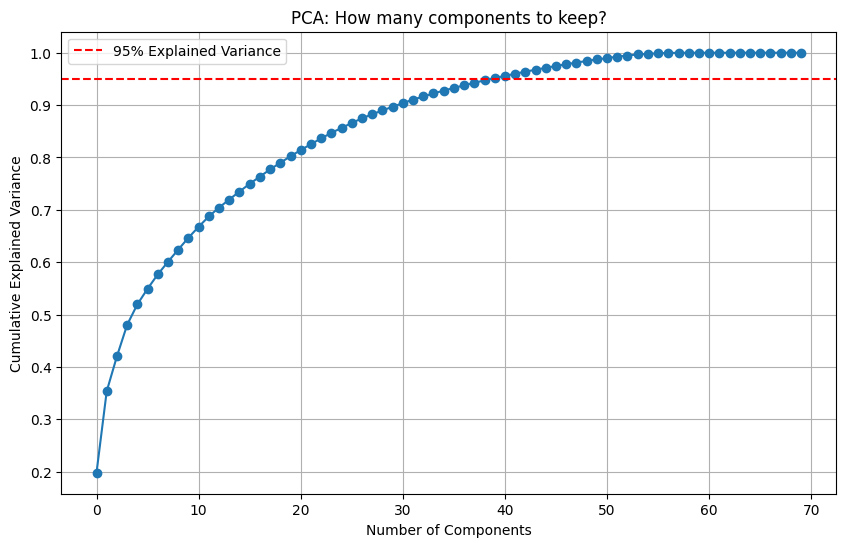

Number of components needed to explain 95% of variance: 40
For n_clusters = 2, the average silhouette_score is : 0.950


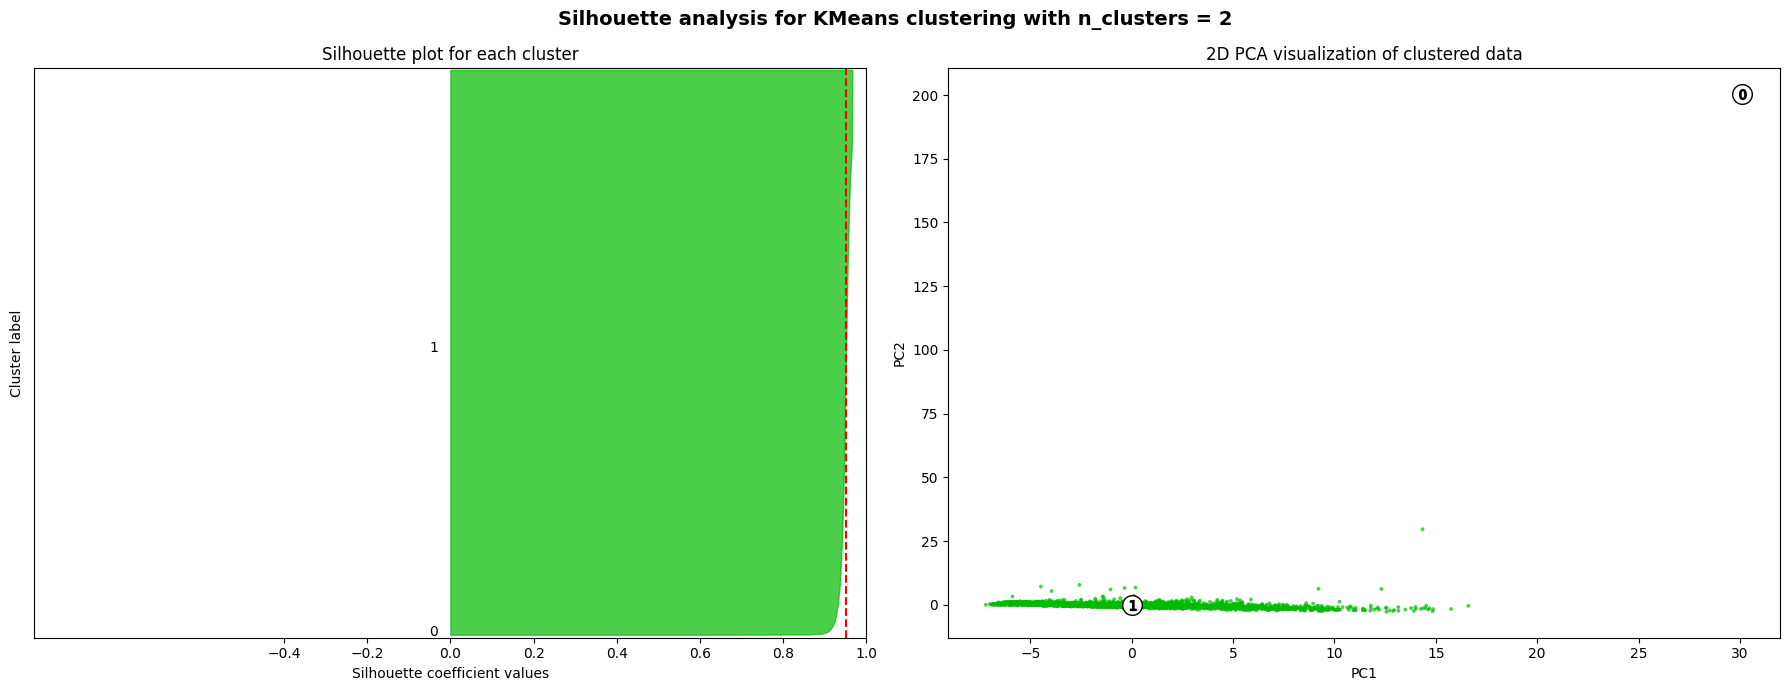

For n_clusters = 3, the average silhouette_score is : 0.119


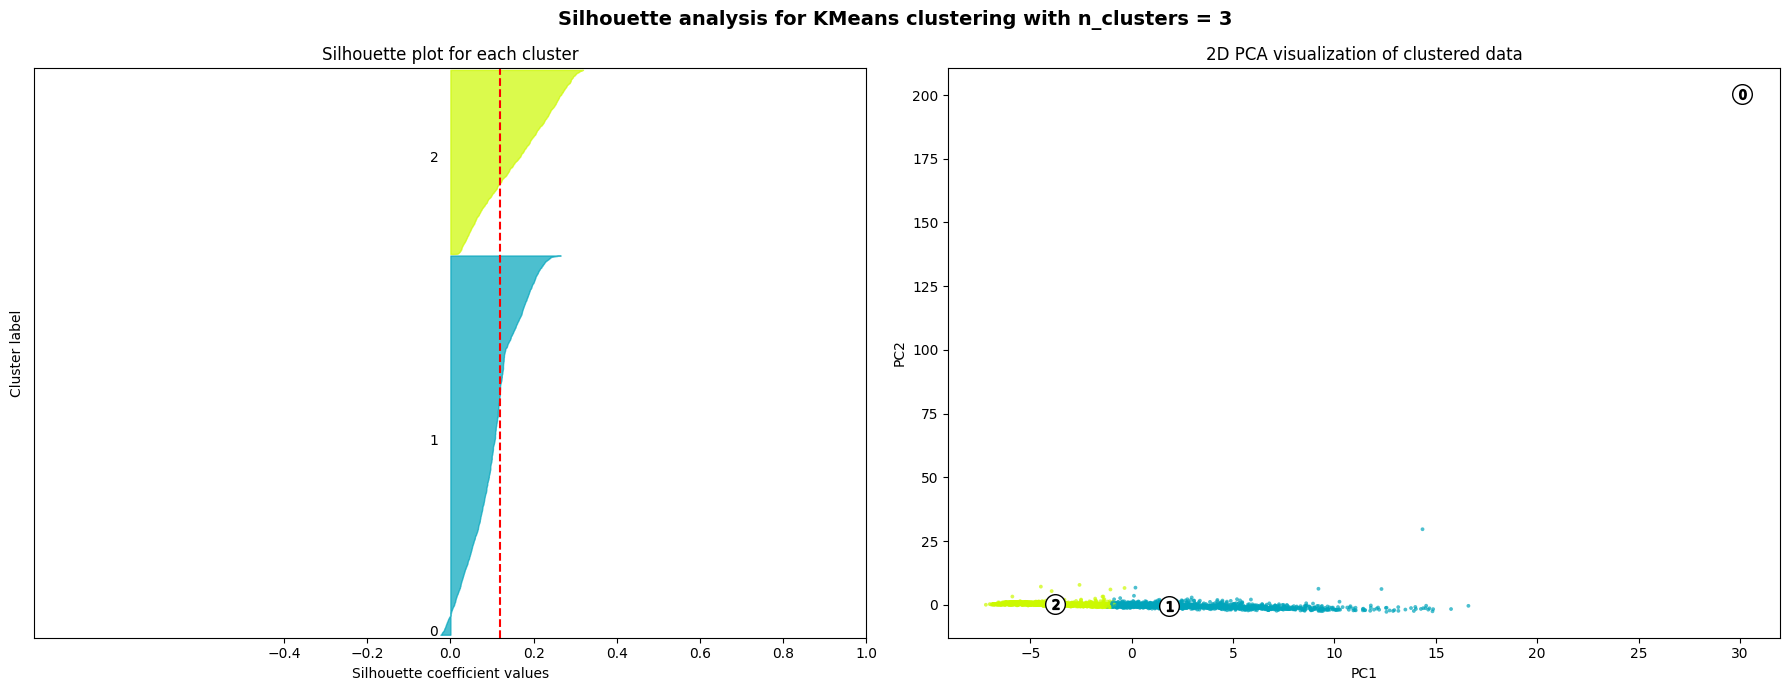

For n_clusters = 4, the average silhouette_score is : 0.130


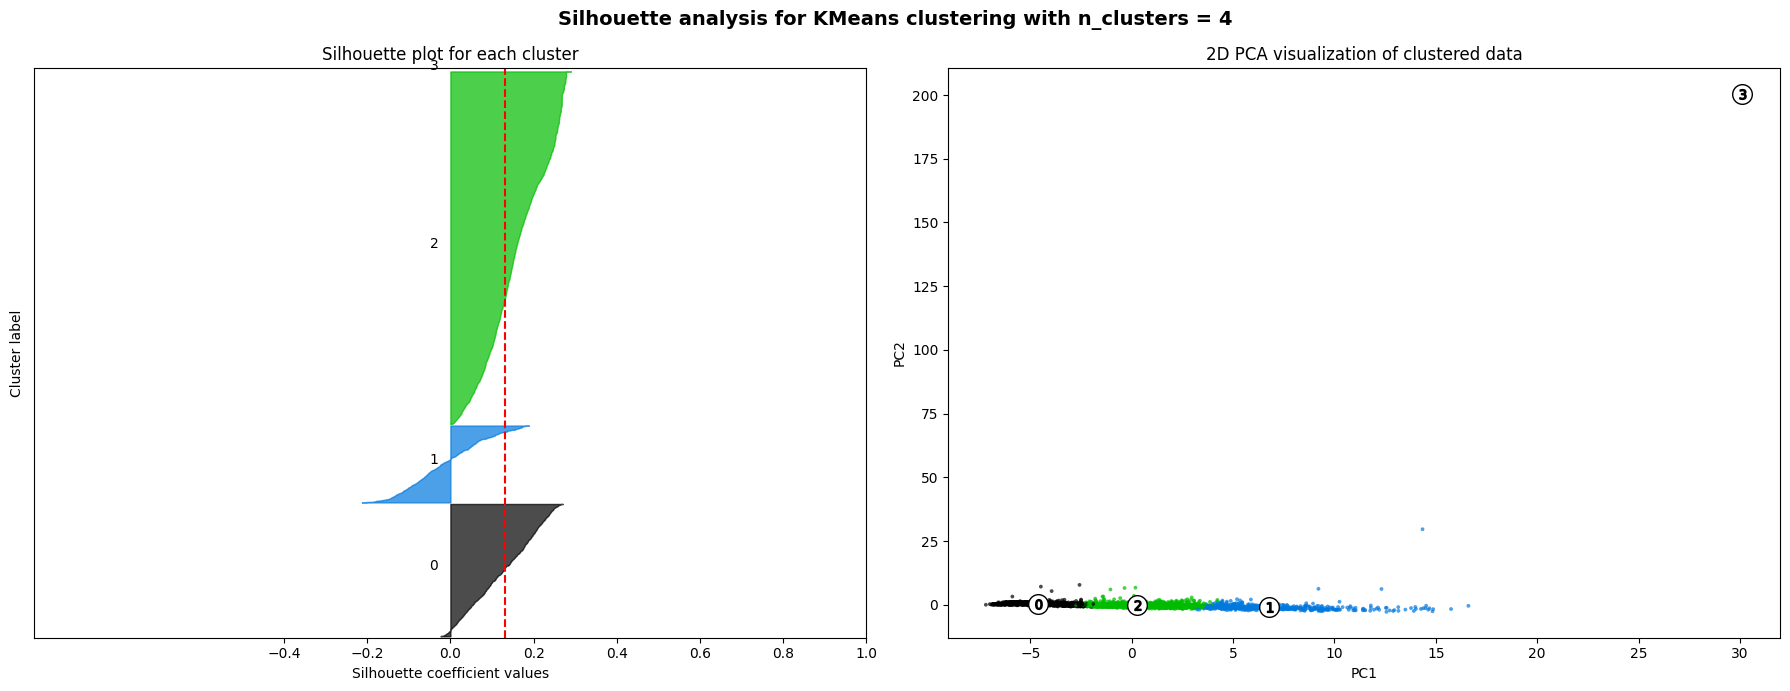

For n_clusters = 5, the average silhouette_score is : 0.130


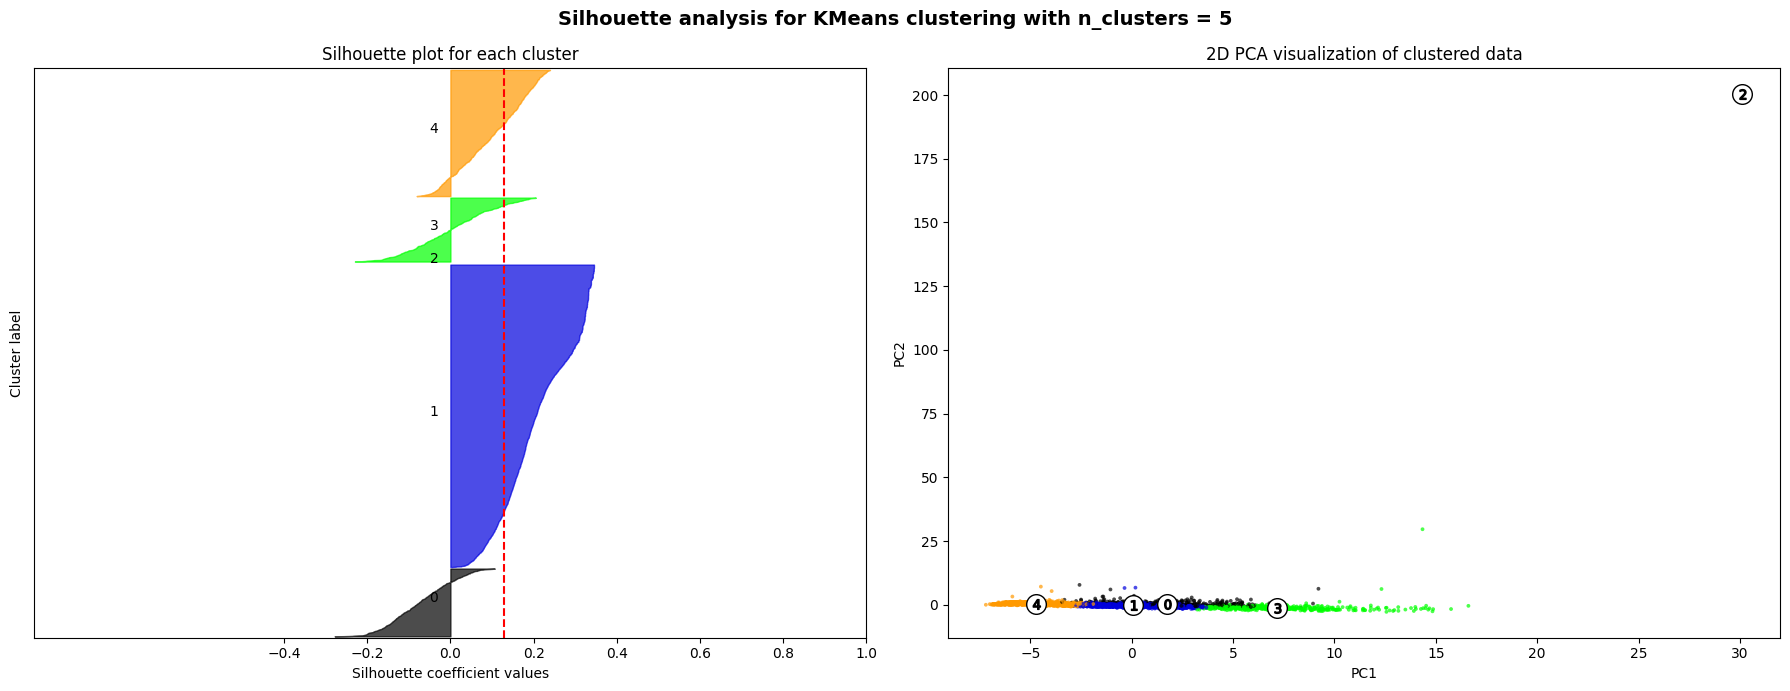

For n_clusters = 6, the average silhouette_score is : 0.120


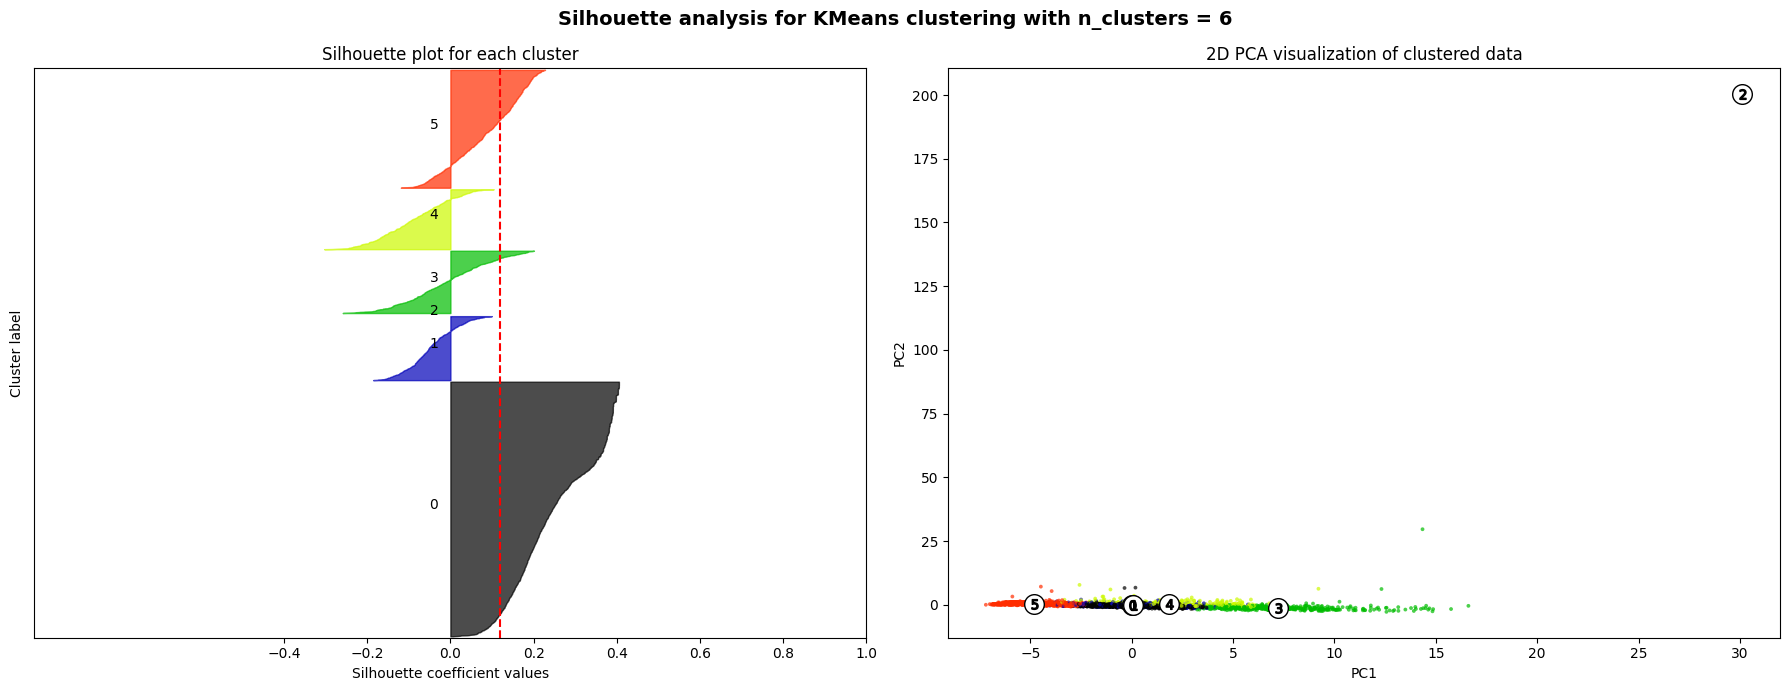

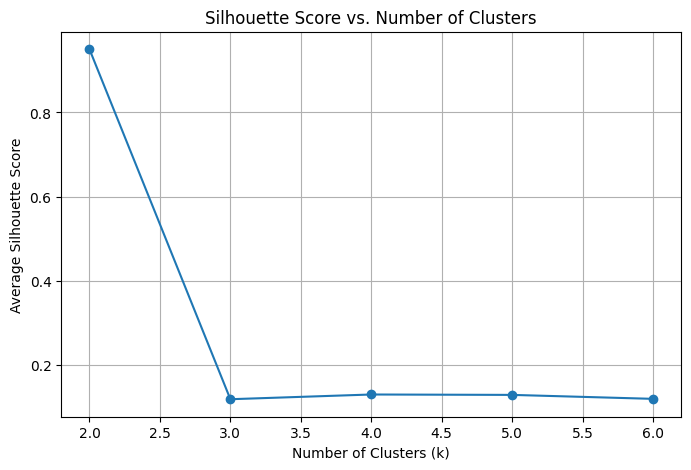

In [4]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Apply PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.grid(True)
plt.title('PCA: How many components to keep?')
plt.legend()
plt.show()

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed to explain 95% of variance: {n_components}")


# Simulate high-dimensional data (like 40 PC components)
pca2  = PCA(n_components = n_components)
x_pca = pca.fit_transform(x_scaled)
X = x_pca

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for each cluster")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.linspace(-0.4, 1.0, 8))

    # Reduce dimensionality for visualization only
    pca_vis = PCA(n_components=2)
    X_vis = pca_vis.fit_transform(X)
    centers_vis = pca_vis.transform(clusterer.cluster_centers_)

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_vis[:, 0], X_vis[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    ax2.scatter(centers_vis[:, 0], centers_vis[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers_vis):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("2D PCA visualization of clustered data")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

    plt.tight_layout()
    plt.show()

# Optional: plot silhouette score vs number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()


## Using KMeans

/root/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


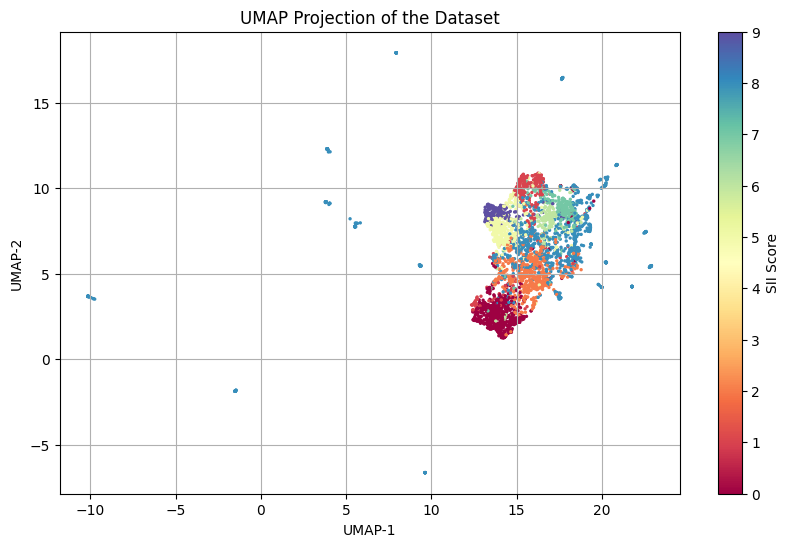

In [40]:
# Dimensionality reduction using UMAP
# First, install the correct UMAP package
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Create and fit UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = reducer.fit_transform(x_scaled)

kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(x_umap)

# Plot the 2D UMAP projection
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=cluster_labels, cmap='Spectral', s=2)
plt.colorbar(scatter, label="SII Score")
plt.title("UMAP Projection of the Dataset")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

## Using DBSCAN

/root/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


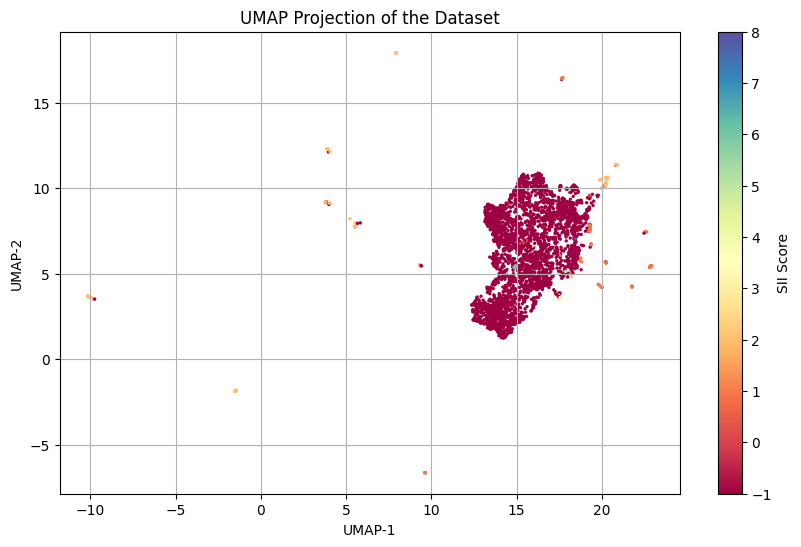

In [33]:
# Dimensionality reduction using UMAP
# First, install the correct UMAP package
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN  # Add this import

dbscan = DBSCAN(eps=0.5, min_samples=10)
cluster_labels = dbscan.fit_predict(x_scaled) 

# Create and fit UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = reducer.fit_transform(x_scaled)

# Plot the 2D UMAP projection
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=cluster_labels, cmap='Spectral', s=2)
plt.colorbar(scatter, label="SII Score")
plt.title("UMAP Projection of the Dataset")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

## Using BIRCH

/root/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


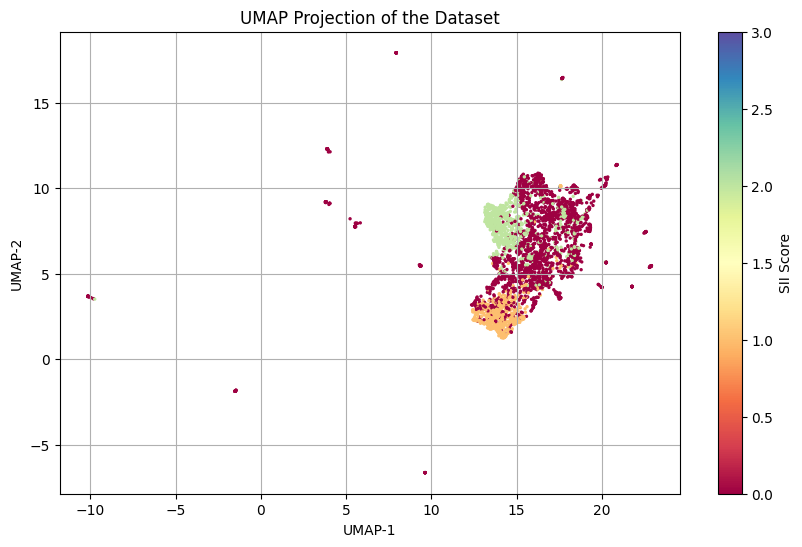

In [34]:
from sklearn.cluster import Birch  # Add this import

birch = Birch(n_clusters=10)  # You can also set `threshold` instead of `n_clusters`
cluster_labels = birch.fit_predict(x_scaled)

# 3. Use UMAP to reduce dimensions for visualization
reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = reducer.fit_transform(x_scaled)


# Plot the 2D UMAP projection
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=cluster_labels, cmap='Spectral', s=2)
plt.colorbar(scatter, label="SII Score")
plt.title("UMAP Projection of the Dataset")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

In [37]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, Birch, DBSCAN
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
import numpy as np


# 2. Define clustering algorithms
clustering_models = {
    "KMeans": KMeans(n_clusters=10, random_state=42),
    "BIRCH": Birch(n_clusters=10),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5)
}

# 3. Set up K-Fold (simulate cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluate each model
for name, model in clustering_models.items():
    silhouette_scores = []

    for train_index, _ in kf.split(x_scaled):
        X_train = x_scaled[train_index]

        # Fit clustering model
        model.fit(X_train)

        # Predict cluster labels (DBSCAN uses fit_predict)
        if hasattr(model, "labels_"):  # for DBSCAN
            labels = model.labels_
        else:
            labels = model.predict(X_train)

        # Silhouette needs at least 2 clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X_train, labels)
            silhouette_scores.append(score)

    if silhouette_scores:
        print(f"{name} - Avg Silhouette Score: {np.mean(silhouette_scores):.4f}")
    else:
        print(f"{name} - Not enough clusters formed for silhouette score")


KMeans - Avg Silhouette Score: 0.0997
BIRCH - Avg Silhouette Score: 0.0531
DBSCAN - Avg Silhouette Score: -0.1994


In [46]:
test_df = pd.read_csv("test.csv")

In [85]:


# Select numeric columns
numeric_columns = test_df.select_dtypes(include=['float64', 'int64']).columns
x_test_numeric = test_df[numeric_columns]


imputer = SimpleImputer(strategy='mean')
x_test_imputed = imputer.fit_transform(x_test_numeric)


scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test_imputed)


In [88]:
x_test_umap = reducer.fit_transform(x_test_scaled)
cluster_labels = kmeans.fit_predict(x_test_umap)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea0cda17-da0a-40df-9d9f-7b9955486c90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>